In [1]:
import tensorflow as tf
# È†êË®≠ÊÉÖÊ≥Å‰∏ãÔºåtensorflowÊúÉÁÇ∫‰∫ÜÈÅøÂÖçÁ¢éÁâáÂåñÁöÑË®òÊÜ∂È´îÈÄ†ÊàêÊïàËÉΩ‰∏ç‰Ω≥ÁöÑÊÉÖÊ≥ÅËÄå‰∏ÄÊ¨°ÊÄßÁöÑ‰ΩîÁî®È°ØÂç°ÊâÄÊúâË®òÊÜ∂È´îÔºå
# ÈÄôÈÉ®‰ªΩÂèØ‰ª•ÈÄèÈÅétf.config‰æÜÈôêÂà∂Á°¨È´îË≥áÊ∫ê‰ª•ÂèäÊåáÂÆöÈ°ØÂç°Ë®òÊÜ∂È´îÁöÑ‰ΩøÁî®„ÄÇ
def select_gpu(N):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    print(gpus)
    if gpus:
        try:
            for gpu in gpus:
                # If memory growth is enabled for a PhysicalDevice, 
                # the runtime initialization will not allocate all memory on the device. 
                # Memory growth cannot be configured on a PhysicalDevice with virtual devices configured.
                tf.config.experimental.set_memory_growth(gpu, True)
            # ÊåáÂÆö‰ΩøÁî®Âì™È°ÜGPU
            tf.config.experimental.set_visible_devices(gpus[N], 'GPU')
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            print(e)

In [2]:
select_gpu(0) 
epochs = 5
model_name = 'bert-base'
sequence_length = 48

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]
3 Physical GPUs, 1 Logical GPUs


In [3]:
import pandas as pd
import numpy as np
import json

In [4]:
data_path = '/home/Danny/Data-Mining/lab2/kaggle/data/'

In [5]:
json_list = list()
with open(data_path + 'tweets_DM.json' , 'r') as file:
    for line in file:
        json_list.append(json.loads(line))

In [6]:
tweet_list = list()
for json in json_list:
    tweet_id = json['_source']['tweet']['tweet_id']
    hashtags = json['_source']['tweet']['hashtags']
    hashtag = ' '.join(hashtags)
    text = json['_source']['tweet']['text']
#     text = text + ' ' + hashtag
    tweet_list.append([tweet_id, text])

In [7]:
emotion_df = pd.read_csv(data_path + 'emotion.csv')
emotion_df

tweet_id       emotion
0        0x3140b1       sadness
1        0x368b73       disgust
2        0x296183  anticipation
3        0x2bd6e1           joy
4        0x2ee1dd  anticipation
...           ...           ...
1455558  0x38dba0           joy
1455559  0x300ea2           joy
1455560  0x360b99          fear
1455561  0x22eecf           joy
1455562  0x2fb282  anticipation

[1455563 rows x 2 columns]

In [8]:
identification_df = pd.read_csv(data_path + 'data_identification.csv')
identification_df

tweet_id identification
0        0x28cc61           test
1        0x29e452          train
2        0x2b3819          train
3        0x2db41f           test
4        0x2a2acc          train
...           ...            ...
1867530  0x227e25          train
1867531  0x293813          train
1867532  0x1e1a7e          train
1867533  0x2156a5          train
1867534  0x2bb9d2          train

[1867535 rows x 2 columns]

In [9]:
emoji_dict = {
    "üòÇ": "lolface",
    "üòá": "smile",
    "üòÄ": "smile",
    "üéâ": "party",
    "üò≥": "embarrassed",
    "üòî": "sadface",
    "üëÄ": "shifty",
    "ü§∑": "shrugging",
    "üíî": "brokenhearted",
    "üëª": "ghost",
    "üòç": "heart",
    "üôÑ": "disdain",
    "üíñ": "heart",
    "‚úå": "victory",
    "üé∂": "music",
    "üò±": "shock",
    "üòÉ": "smile",
    "üòí": "unsatisfied",
    "üëä": "brofist",
    "üòÑ": "smile",
    "üåû": "smile",
    "üôå": "celebration",
    "üòÅ": "smile",
    "ü§ó": "hugging",
    "ü§£": "rofl",
    "üåà": "gaypride",
    "üòâ": "winking",
    "üíû": "heart",
    "üôÉ": "irony",
    "üòú": "winking",
    "üò≠": "bawling",
    "ü§î": "thinker",
    "üòé": "cool",
    "üíõ": "heart",
    "üíö": "heart",
    "üíÉ": "fun",
    "üíó": "heart",
    "üò¨": "awkward",
    "üòå": "relieved",
    "üòÖ": "whew",
    "üíã": "kiss",
    "üôà": "laugh",
    "üòä": "^^",
    "üëå": "okay",
    "üò°": "angry",
    "üòò": "kiss",
    "üò©": "weary",
    "üî•": "excellent",
    "üíô": "heart",
    "üíï": "heart",
    "üëè": "clapping",
    "üëç": "thumbsup",
    "üíØ": "perfect",
    "üíú": "heart",
    "üïò" : "late",
    "üò°" : "angry",
    "üòí" : "dissatisfied",
    "üò§" : "angry",
    "üò†" : "angry",
    "üòë" : "annoy",
    "üò∞": "anxious",
    "üòØ": "surprise",
    "üò®": "scared",
    "üò≤": "astonished",
    "üí™": "strong",
    "ü§¶": "facepalm",
    "‚ú®": "sparkle",
    "üò¢": "crying",
    "üíì": "heart",
    "üëë": "crown",
    "ü§ò": "rockon",
    "üåπ": "rose",
    "üòã": "delicious",
    "üòè": "flirting",
    "üòÜ": "XD",
    "üò´": "exhausted",
    "üò¶": "frowning",
    "üôè": "please",
}

In [10]:
frequent_name_dict = {
    "#realdonaldtrump": "sadness",
    "#fifthharmony": "sadness",
    "#mostrequestlive": "sadness",
    "#onairromeo": "sadness",
    "#matthardybrand": "sadness",
}

In [11]:
text_df = pd.DataFrame(tweet_list, columns=['tweet_id', 'text'])
text_df

tweet_id                                               text
0        0x376b20  People who post "add me on #Snapchat" must be ...
1        0x2d5350  @brianklaas As we see, Trump is dangerous to #...
2        0x28b412  Confident of your obedience, I write to you, k...
3        0x1cd5b0                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>
4        0x2de201  "Trust is not the same as faith. A friend is s...
...           ...                                                ...
1867530  0x316b80  When you buy the last 2 tickets remaining for ...
1867531  0x29d0cb  I swear all this hard work gone pay off one da...
1867532  0x2a6a4f  @Parcel2Go no card left when I wasn't in so I ...
1867533  0x24faed  Ah, corporate life, where you can date <LH> us...
1867534  0x34be8c             Blessed to be living #Sundayvibes <LH>

[1867535 rows x 2 columns]

In [12]:
import re
def replace_word(text):
    text_list = text.split()
    for i, j in enumerate(text_list):
        if j in emoji_dict:
            text_list[i] = emoji_dict[j]
        if j in frequent_name_dict:
            text_list[i] = frequent_name_dict[j]
    text = ' '.join(text_list)
    text = re.sub('<lh>|<|>|@|#|', '', text)
    return text.split()

In [13]:
%%time
import nltk
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)

text_df['token'] = text_df['text'].apply(lambda s : s.lower())
text_df['token'] = text_df['token'].apply(lambda s : tweet_tokenizer.tokenize(s))
text_df['token'] = text_df['token'].apply(lambda s : ' '.join(s))
text_df['token'] = text_df['token'].apply(lambda s : replace_word(s))

# text_df['token'] = text_df['text'].apply(lambda s : s.split())
text_df

CPU times: user 3min 36s, sys: 37.6 s, total: 4min 14s
Wall time: 4min 20s


tweet_id                                               text  \
0        0x376b20  People who post "add me on #Snapchat" must be ...   
1        0x2d5350  @brianklaas As we see, Trump is dangerous to #...   
2        0x28b412  Confident of your obedience, I write to you, k...   
3        0x1cd5b0                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>   
4        0x2de201  "Trust is not the same as faith. A friend is s...   
...           ...                                                ...   
1867530  0x316b80  When you buy the last 2 tickets remaining for ...   
1867531  0x29d0cb  I swear all this hard work gone pay off one da...   
1867532  0x2a6a4f  @Parcel2Go no card left when I wasn't in so I ...   
1867533  0x24faed  Ah, corporate life, where you can date <LH> us...   
1867534  0x34be8c             Blessed to be living #Sundayvibes <LH>   

                                                     token  
0        [people, who, post, ", add, me, on, snapchat, ...  
1        [as, we, see, ,, trump, is, dangerous, to, fre...  
2        [confident, of, your, obedience, ,, i, write, ...  
3        [now, issa, is, stalking, tasha, lolface, lolf...  
4        [", trust, is, not, the, same, as, faith, ., a...  
...                                                    ...  
1867530  [when, you, buy, the, last, 2, tickets, remain...  
1867531  [i, swear, all, this, hard, work, gone, pay, o...  
1867532  [no, card, left, when, i, wasn't, in, so, i, h...  
1867533  [ah, ,, corporate, life, ,, where, you, can, d...  
1867534             [blessed, to, be, living, sundayvibes]  

[1867535 rows x 3 columns]

In [14]:
test_df = identification_df[identification_df['identification'] == 'test']
# test_df

In [15]:
train_df = text_df.merge(emotion_df, left_on='tweet_id', right_on='tweet_id')
# train_df

In [16]:
x_list = train_df['token'].to_list()
y_list = train_df['emotion'].to_list()
print(len(x_list))
print(len(y_list))

1455563
1455563


In [17]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_list, y_list, test_size=0.2, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
print(len(train_x), len(train_y))
print(len(test_x), len(test_y))
print(len(valid_x), len(valid_y))

931560 931560
291113 291113
232890 232890


In [18]:
%%time
import kashgari
from kashgari.tasks.classification import BiLSTM_Model
kashgari.config.use_cudnn_cell = True
import logging
logging.basicConfig(level='DEBUG')
from kashgari.embeddings import BertEmbedding
bert_embed = BertEmbedding('/home/Danny/pretrain_model/{}'.format(model_name))
model = BiLSTM_Model(bert_embed, 
                     sequence_length=sequence_length,
#                      sequence_length: Union[str, int] = 'auto',
                    )
history = model.fit(train_x, 
                    train_y, 
                    valid_x, 
                    valid_y,
                    epochs=epochs,
                    batch_size=256,
         )

2020-12-03 20:02:56,403 [DEBUG] kashgari - ------------------------------------------------
2020-12-03 20:02:56,403 [DEBUG] kashgari - Loaded transformer model's vocab
2020-12-03 20:02:56,404 [DEBUG] kashgari - config_path       : /home/Danny/pretrain_model/bert-base/bert_config.json
2020-12-03 20:02:56,404 [DEBUG] kashgari - vocab_path      : /home/Danny/pretrain_model/bert-base/vocab.txt
2020-12-03 20:02:56,404 [DEBUG] kashgari - checkpoint_path : /home/Danny/pretrain_model/bert-base/bert_model.ckpt
2020-12-03 20:02:56,404 [DEBUG] kashgari - Top 50 words    : ['[PAD]', '[unused0]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[unused25]', '[unused26]', '[unused27]', '[unused28]', '[unused29]', '[unused30]'

Epoch 1/5
3638/3638 [==============================] - 3143s 864ms/step - loss: 1.3717 - accuracy: 0.4985 - val_loss: 1.2931 - val_accuracy: 0.5296
Epoch 2/5
3638/3638 [==============================] - 3285s 903ms/step - loss: 1.2764 - accuracy: 0.5357 - val_loss: 1.2556 - val_accuracy: 0.5443
Epoch 3/5
3638/3638 [==============================] - 3149s 865ms/step - loss: 1.2365 - accuracy: 0.5513 - val_loss: 1.2495 - val_accuracy: 0.5472
Epoch 4/5
3638/3638 [==============================] - 3105s 853ms/step - loss: 1.2103 - accuracy: 0.5612 - val_loss: 1.2440 - val_accuracy: 0.5503
Epoch 5/5
3638/3638 [==============================] - 3103s 853ms/step - loss: 1.1892 - accuracy: 0.5688 - val_loss: 1.2411 - val_accuracy: 0.5518
CPU times: user 1h 45min 2s, sys: 8min 10s, total: 1h 53min 13s
Wall time: 4h 24min 1s


In [19]:
model_path = 'model/{}_epoch_{}'.format(model_name, epochs)
model.save(model_path)
model.evaluate(test_x, test_y)

2020-12-04 00:26:55,081 [WARNING] kashgari - Sequence length is None, will use the max length of the samples, which is 101
2020-12-04 00:26:57,307 [DEBUG] kashgari - predict input shape (2, 291113, 101) x: 
(array([[ 101, 2042, 1037, ...,    0,    0,    0],
       [ 101, 3582, 2256, ...,    0,    0,    0],
       [ 101, 4687, 2065, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2499, ...,    0,    0,    0],
       [ 101, 1998, 2442, ...,    0,    0,    0],
       [ 101, 6343,  100, ...,    0,    0,    0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))
2020-12-04 01:05:03,533 [DEBUG] kashgari - predict output shape (291113, 8)
2020-12-04 01:05:03,664 [DEBUG] kashgari - predict output argmax: [0 0 0 ... 3 0 0]


              precision    recall  f1-score   support

       anger     0.5482    0.2161    0.3100      7946
anticipation     0.6520    0.5564    0.6004     49984
     disgust     0.4318    0.3513    0.3874     27669
        fear     0.4251    0.3565    0.3878     12846
         joy     0.5770    0.7826    0.6643    102943
     sadness     0.4422    0.5026    0.4705     38745
    surprise     0.5636    0.2167    0.3130      9816
       trust     0.5755    0.3441    0.4307     41164

    accuracy                         0.5502    291113
   macro avg     0.5269    0.4158    0.4455    291113
weighted avg     0.5500    0.5502    0.5345    291113



2020-12-04 01:05:16,735 [INFO] kashgari - model saved to /home/Danny/Data-Mining/lab2/kaggle/kashgari/model/bert-base_epoch_5


'/home/Danny/Data-Mining/lab2/kaggle/kashgari/model/bert-base_epoch_5'

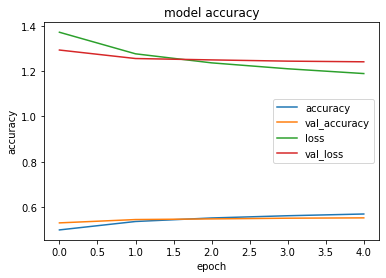

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()

In [22]:
# model_path = 'model/{}_epoch_{}'.format(model_name, epochs)
# model = kashgari.utils.load_model(model_path)
# model.evaluate(test_x, test_y)

In [23]:
test_df = test_df.merge(text_df, left_on='tweet_id', right_on='tweet_id')
test_df

tweet_id identification  \
0       0x28cc61           test   
1       0x2db41f           test   
2       0x2466f6           test   
3       0x23f9e9           test   
4       0x1fb4e1           test   
...          ...            ...   
411967  0x2c4dc2           test   
411968  0x31be7c           test   
411969  0x1ca58e           test   
411970  0x35c8ba           test   
411971  0x1d941b           test   

                                                     text  \
0       @Habbo I've seen two separate colours of the e...   
1       @FoxNews @KellyannePolls No serious self respe...   
2       Looking for a new car, and it says 1 lady owne...   
3       @cineworld ‚Äúonly the brave‚Äù just out and fount...   
4       Felt like total dog üí© going into open gym and ...   
...                                                   ...   
411967  6 year old walks in astounded. Mum! Look how b...   
411968  Only one week to go until the #inspiringvolunt...   
411969  I just got caught up with the manga for "My He...   
411970  Speak only when spoken to and make hot ass mus...   
411971  Know what you want and go for it. Fuck everyon...   

                                                    token  
0       [i've, seen, two, separate, colours, of, the, ...  
1       [no, serious, self, respecting, individual, be...  
2       [looking, for, a, new, car, ,, and, it, says, ...  
3       [‚Äú, only, the, brave, ‚Äù, just, out, and, fount...  
4       [felt, like, total, dog, üí©, going, into, open,...  
...                                                   ...  
411967  [6, year, old, walks, in, astounded, ., mum, !...  
411968  [only, one, week, to, go, until, the, inspirin...  
411969  [i, just, got, caught, up, with, the, manga, f...  
411970  [speak, only, when, spoken, to, and, make, hot...  
411971  [know, what, you, want, and, go, for, it, ., f...  

[411972 rows x 4 columns]

In [24]:
text_list = test_df['token'].tolist()
text_list

[["i've",
  'seen',
  'two',
  'separate',
  'colours',
  'of',
  'the',
  'elegant',
  'furni',
  'on',
  'your',
  'homepage',
  '?'],
 ['no',
  'serious',
  'self',
  'respecting',
  'individual',
  'believes',
  'much',
  'less',
  'agrees',
  'w',
  'her'],
 ['looking',
  'for',
  'a',
  'new',
  'car',
  ',',
  'and',
  'it',
  'says',
  '1',
  'lady',
  'owner',
  '.',
  'that',
  'means',
  'needs',
  'new',
  'clutch',
  ',',
  'gearbox',
  'and',
  'brakes',
  '.',
  'womendrivers'],
 ['‚Äú',
  'only',
  'the',
  'brave',
  '‚Äù',
  'just',
  'out',
  'and',
  'fountain',
  'park',
  'have',
  'only',
  '3',
  'showings',
  'per',
  'day',
  '!',
  'robbingmembers'],
 ['felt',
  'like',
  'total',
  'dog',
  'üí©',
  'going',
  'into',
  'open',
  'gym',
  'and',
  'had',
  'a',
  'migraine',
  'played',
  'through',
  'and',
  'sweated',
  'it',
  'out',
  'and',
  'my',
  'sweat',
  'has',
  'never',
  'been',
  'that',
  'bad',
  '.'],
 ['rysenshyne',
  'plz',
  'ply',
  

In [25]:
predict_list = model.predict(text_list)
predict_list

2020-12-04 01:05:27,558 [DEBUG] kashgari - predict input shape (2, 411972, 96) x: 
(array([[ 101,  100, 2464, ...,    0,    0,    0],
       [ 101, 2053, 3809, ...,    0,    0,    0],
       [ 101, 2559, 2005, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2074, ...,    0,    0,    0],
       [ 101, 3713, 2069, ...,    0,    0,    0],
       [ 101, 2113, 2054, ...,    0,    0,    0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))
2020-12-04 01:56:32,391 [DEBUG] kashgari - predict output shape (411972, 8)
2020-12-04 01:56:32,707 [DEBUG] kashgari - predict output argmax: [3 0 4 ... 3 0 0]


['sadness',
 'joy',
 'disgust',
 'sadness',
 'disgust',
 'joy',
 'trust',
 'anticipation',
 'anticipation',
 'disgust',
 'joy',
 'disgust',
 'sadness',
 'trust',
 'joy',
 'joy',
 'fear',
 'joy',
 'joy',
 'joy',
 'disgust',
 'joy',
 'sadness',
 'joy',
 'trust',
 'joy',
 'joy',
 'joy',
 'sadness',
 'anticipation',
 'sadness',
 'trust',
 'trust',
 'trust',
 'sadness',
 'joy',
 'anticipation',
 'joy',
 'disgust',
 'joy',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'trust',
 'anticipation',
 'trust',
 'joy',
 'joy',
 'disgust',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'joy',
 'joy',
 'disgust',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'joy',
 'trust',
 'sadness',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'disgust',
 'joy',
 'anger',
 'joy',
 'sadness',
 'joy',
 'trust',
 'disgust',
 'sadness',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'anticipation',
 'joy',
 'joy',
 'joy',
 'sadness',
 'joy',
 'disgust',
 'disgust',
 'disgust',
 

In [26]:
test_df['predict'] = predict_list
test_df

tweet_id identification  \
0       0x28cc61           test   
1       0x2db41f           test   
2       0x2466f6           test   
3       0x23f9e9           test   
4       0x1fb4e1           test   
...          ...            ...   
411967  0x2c4dc2           test   
411968  0x31be7c           test   
411969  0x1ca58e           test   
411970  0x35c8ba           test   
411971  0x1d941b           test   

                                                     text  \
0       @Habbo I've seen two separate colours of the e...   
1       @FoxNews @KellyannePolls No serious self respe...   
2       Looking for a new car, and it says 1 lady owne...   
3       @cineworld ‚Äúonly the brave‚Äù just out and fount...   
4       Felt like total dog üí© going into open gym and ...   
...                                                   ...   
411967  6 year old walks in astounded. Mum! Look how b...   
411968  Only one week to go until the #inspiringvolunt...   
411969  I just got caught up with the manga for "My He...   
411970  Speak only when spoken to and make hot ass mus...   
411971  Know what you want and go for it. Fuck everyon...   

                                                    token       predict  
0       [i've, seen, two, separate, colours, of, the, ...       sadness  
1       [no, serious, self, respecting, individual, be...           joy  
2       [looking, for, a, new, car, ,, and, it, says, ...       disgust  
3       [‚Äú, only, the, brave, ‚Äù, just, out, and, fount...       sadness  
4       [felt, like, total, dog, üí©, going, into, open,...       disgust  
...                                                   ...           ...  
411967  [6, year, old, walks, in, astounded, ., mum, !...           joy  
411968  [only, one, week, to, go, until, the, inspirin...  anticipation  
411969  [i, just, got, caught, up, with, the, manga, f...       sadness  
411970  [speak, only, when, spoken, to, and, make, hot...           joy  
411971  [know, what, you, want, and, go, for, it, ., f...           joy  

[411972 rows x 5 columns]

In [27]:
output_df = test_df[['tweet_id', 'predict']]
output_df = output_df.rename(columns={'tweet_id':'id', 'predict':'emotion'})
# output_df

In [28]:
output_path = 'output/{}_epoch_{}.csv'.format(model_name, epochs)
output_df.to_csv(output_path, index=False, header=True)